# Perceptron - Saúde

**ANN Perceptron**

Rede neural previsão de valores de plano de saúde

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
dados = pd.read_csv("Dados/insurance.csv")
dados

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dados.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
dados.columns = ["Idade", "Sexo", "Peso", "Criança", "Fumante", "Região","Preço"]
dados

,Idade,Sexo,Peso,Criança,Fumante,Região,Preço
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
Idade      1338 non-null int64
Sexo       1338 non-null object
Peso       1338 non-null float64
Criança    1338 non-null int64
Fumante    1338 non-null object
Região     1338 non-null object
Preço      1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Estatistica 

**Média**

In [7]:
print("Média das idades", dados.Idade.mean())

Média das idades 39.20702541106129


In [8]:
print("Média das Preço", dados.Preço.mean())

Média das Preço 13270.422265141257


**Mediana**

In [9]:
print("Mediana das idades", dados.Idade.median())

Mediana das idades 39.0


In [10]:
print("Mediana das Preço", dados.Preço.median())

Mediana das Preço 9382.033


**Moda**

In [11]:
print("Mediana das idades", dados.Idade.mode())

Mediana das idades 0    18
dtype: int64


In [12]:
print("Mediana das Preço", dados.Preço.mode())

Mediana das Preço 0    1639.5631
dtype: float64


# Análise exploratoria 

In [13]:
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

In [14]:
dados.describe()

,Idade,Peso,Criança,Preço
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
dados.corr()

,Idade,Peso,Criança,Preço
Idade,1.000000,0.109272,0.042469,0.299008
Peso,0.109272,1.000000,0.012759,0.198341
Criança,0.042469,0.012759,1.000000,0.067998
Preço,0.299008,0.198341,0.067998,1.000000


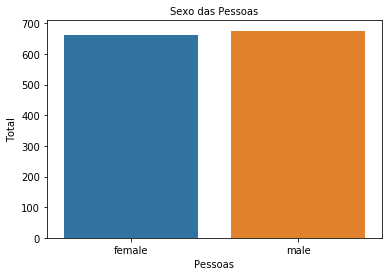

In [16]:
ax = sns.countplot(x='Sexo', data = dados);
ax.set_title("Sexo das Pessoas", fontsize = 10);
ax.set_xlabel("Pessoas")
ax.set_ylabel("Total")
ax

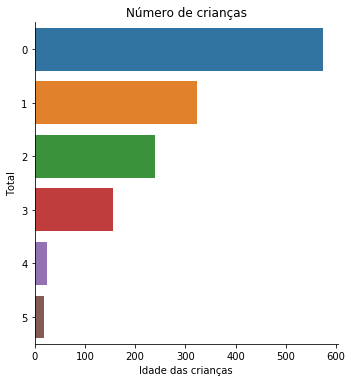

In [17]:
sns.catplot(y = "Criança", kind = "count",data = dados)
plt.title("Número de crianças")
plt.xlabel("Idade das crianças")
plt.ylabel("Total")
plt.show()

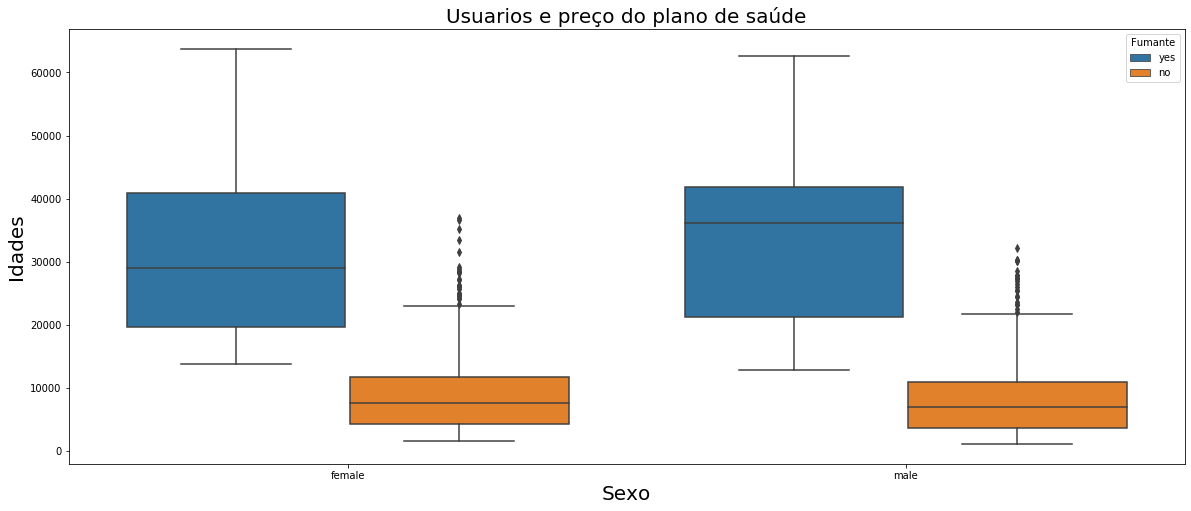

In [18]:
ax = sns.boxplot(x='Sexo', y='Preço', data = dados, hue='Fumante')
ax.figure.set_size_inches(20, 8)
ax.set_title("Usuarios e preço do plano de saúde", fontsize=20);
ax.set_ylabel('Idades', fontsize=20)
ax.set_xlabel("Sexo", fontsize=20)
ax

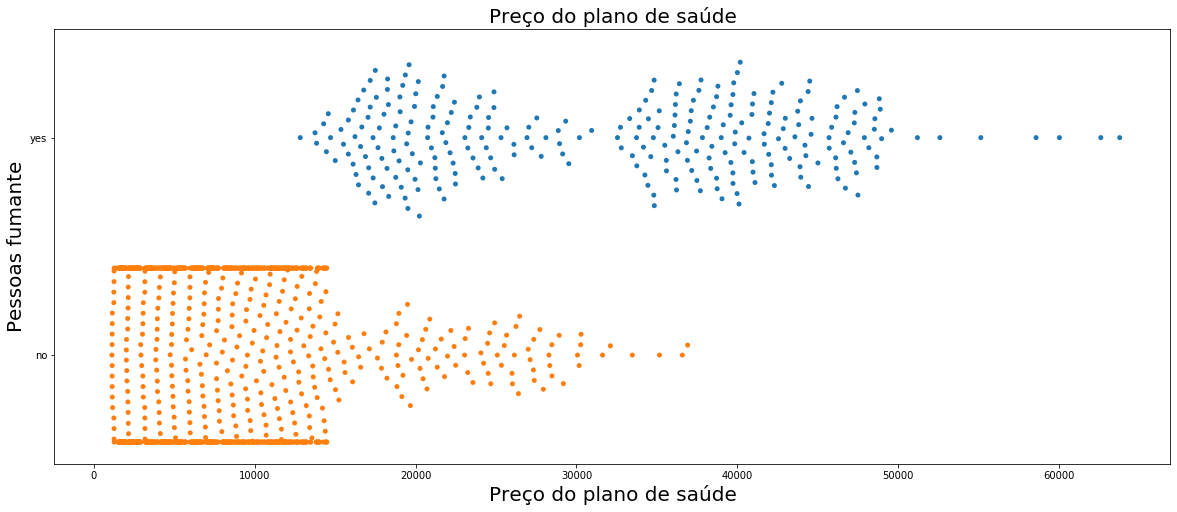

In [19]:
ax = sns.swarmplot(x=dados.Preço, y=dados.Fumante)
ax.figure.set_size_inches(20, 8)
ax.set_title("Preço do plano de saúde", fontsize=20);
ax.set_ylabel('Pessoas fumante', fontsize=20)
ax.set_xlabel("Preço do plano de saúde", fontsize=20)
ax

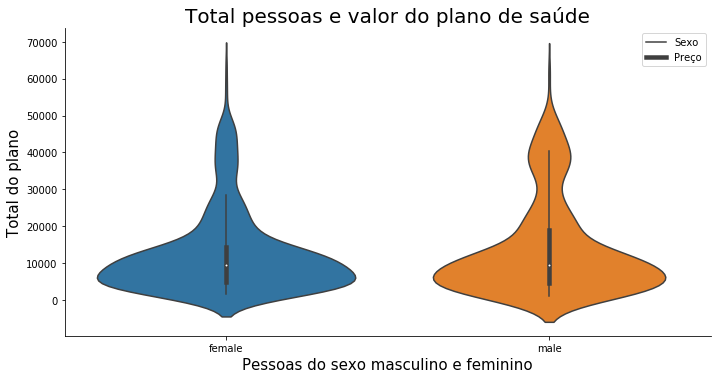

In [20]:
sns.catplot(x="Sexo" , y = "Preço" ,kind="violin" ,data=dados, height=5, aspect=2)
plt.title("Total pessoas e valor do plano de saúde", fontsize = 20)
plt.ylabel("Total do plano", fontsize = 15)
plt.xlabel("Pessoas do sexo masculino e feminino", fontsize = 15)
plt.legend(["Sexo", "Preço"])
plt.show()

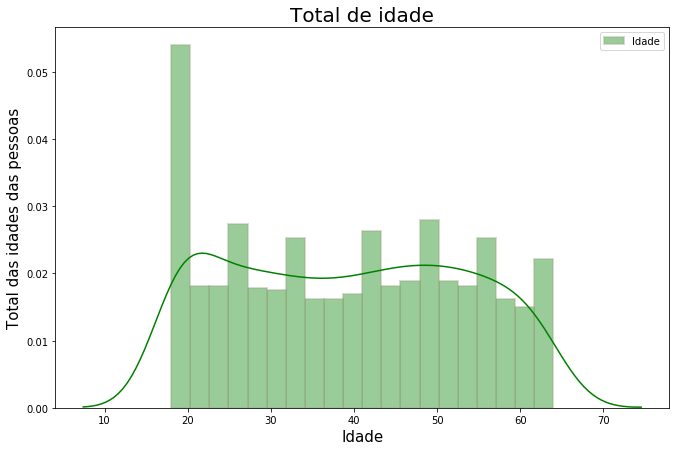

In [21]:
plt.figure(figsize=(11,7))
ax = sns.distplot(dados["Idade"], bins=20 , hist_kws=dict(edgecolor = '#9dab86' ,linewidth=2) , color='green')
plt.title("Total de idade", fontsize = 20)
plt.ylabel("Total das idades das pessoas", fontsize = 15)
plt.xlabel("Idade", fontsize = 15)
plt.legend(["Idade"])
plt.show()

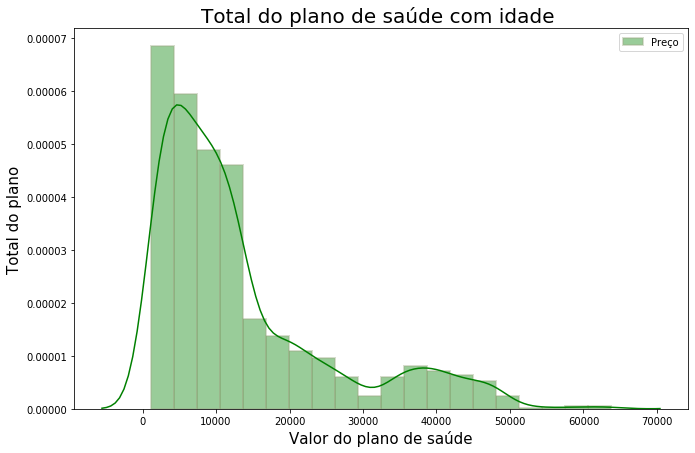

In [22]:
plt.figure(figsize=(11,7))
ax = sns.distplot(dados["Preço"],bins=20 , hist_kws=dict(edgecolor = '#9dab86' ,linewidth=2) , color='green')
plt.title("Total do plano de saúde com idade ", fontsize = 20)
plt.ylabel("Total do plano", fontsize = 15)
plt.xlabel("Valor do plano de saúde", fontsize = 15)
plt.legend(["Preço"])
plt.show()

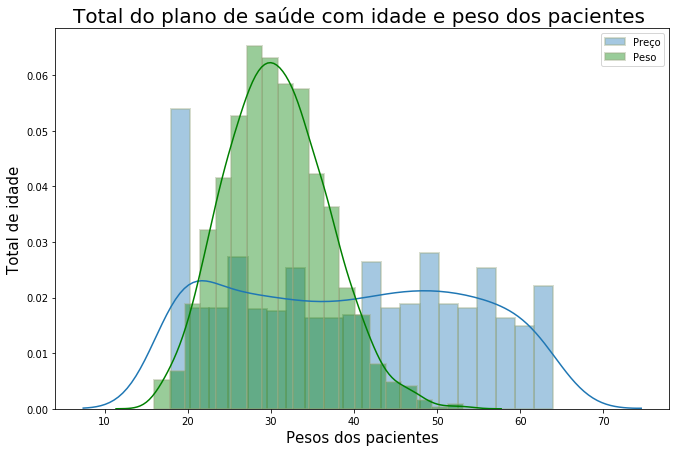

In [23]:
plt.figure(figsize=(11,7))
ax = sns.distplot(dados["Idade"], bins=20 , hist_kws=dict(edgecolor = '#9dab86' ,linewidth=2))                
ax = sns.distplot(dados["Peso"], bins=20 , hist_kws=dict(edgecolor = '#9dab86' ,linewidth=2) , color='green')
plt.title("Total do plano de saúde com idade e peso dos pacientes ", fontsize = 20)
plt.ylabel("Total de idade", fontsize = 15)
plt.xlabel("Pesos dos pacientes", fontsize = 15)
plt.legend(["Preço", "Peso"])
plt.show()

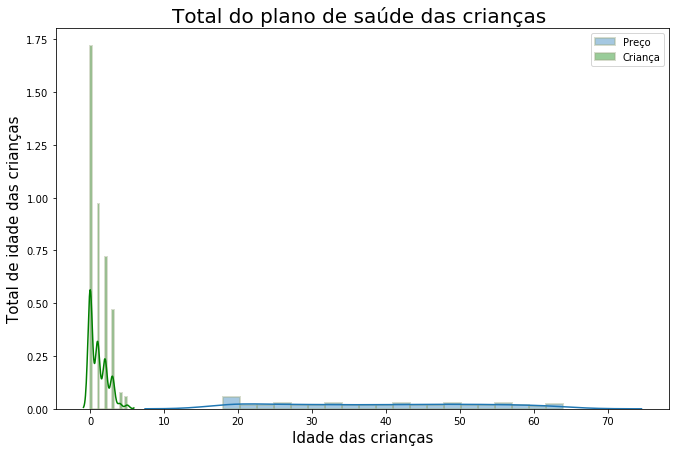

In [24]:
plt.figure(figsize=(11,7))
ax = sns.distplot(dados["Idade"], bins=20 , hist_kws=dict(edgecolor = '#9dab86' ,linewidth=2))                
ax = sns.distplot(dados["Criança"], bins=20 , hist_kws=dict(edgecolor = '#9dab86' ,linewidth=2) , color='green')
plt.title("Total do plano de saúde das crianças ", fontsize = 20)
plt.ylabel("Total de idade das crianças", fontsize = 15)
plt.xlabel("Idade das crianças", fontsize = 15)
plt.legend(["Preço", "Criança"])
plt.show()

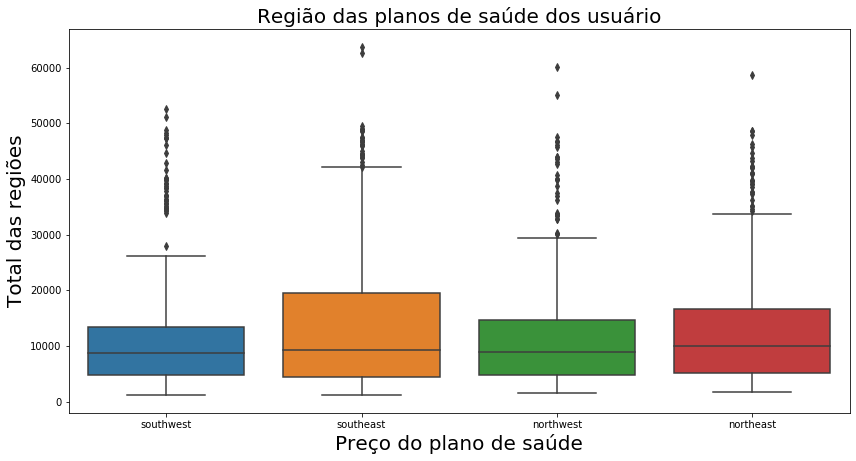

In [25]:
plt.subplots(figsize = (14,24))
plt.subplot(3,1,1)
ax = sns.boxplot(x= dados['Região'] , y= dados['Preço'])
ax.set_title("Região das planos de saúde dos usuário", fontsize=20);
ax.set_ylabel('Total das regiões', fontsize=20)
ax.set_xlabel("Preço do plano de saúde", fontsize=20)
ax

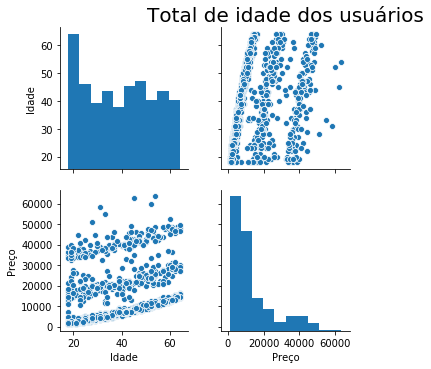

In [26]:
ax = sns.pairplot(dados, vars = ["Idade", "Preço"]);
plt.title("Total de idade dos usuários", fontsize = 20)

plt.show()

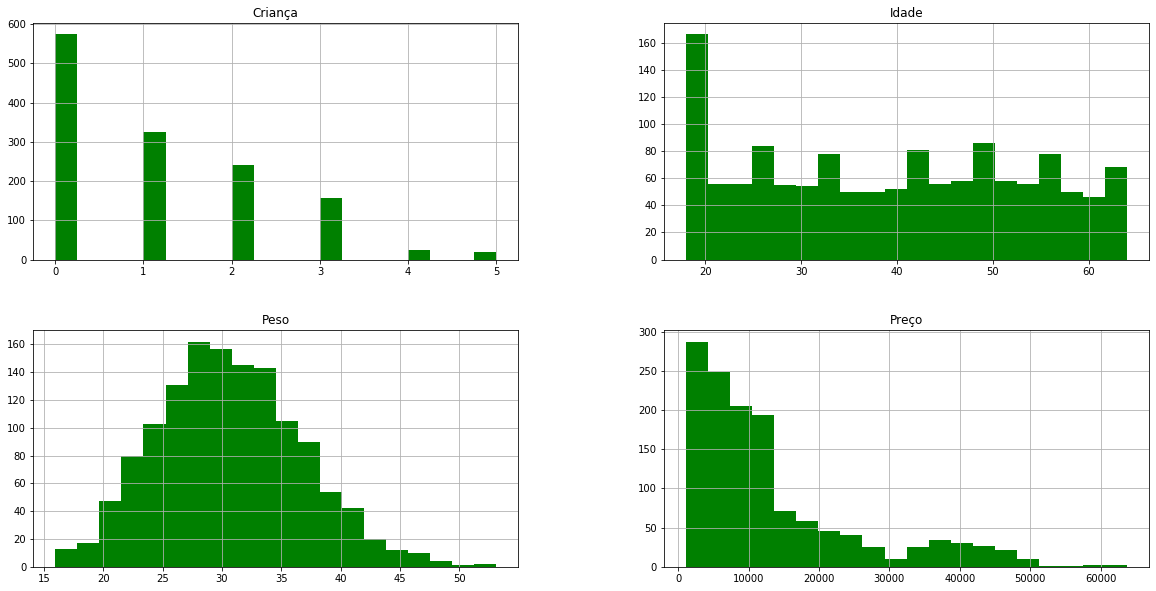

In [27]:
dados.hist(bins = 20, figsize = (20, 10), color = "g");
plt.show()

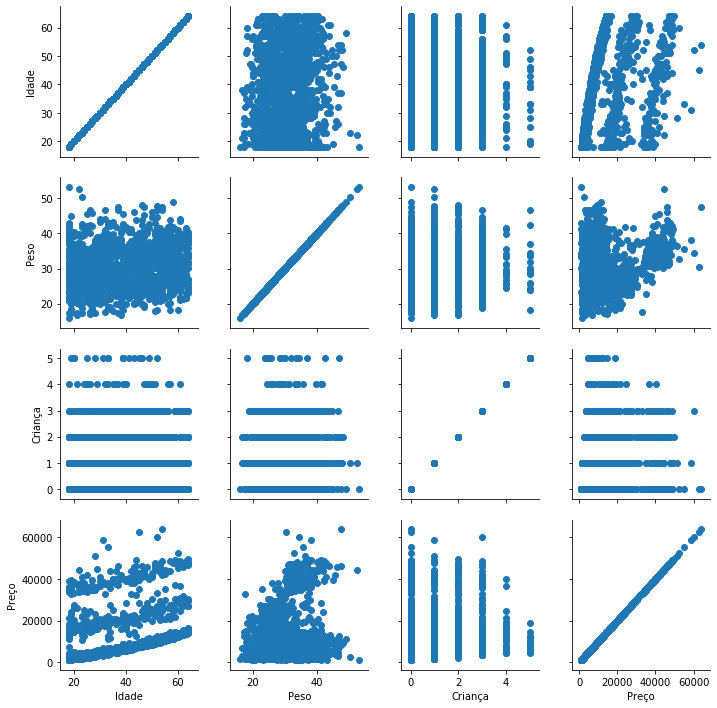

In [28]:
h = sns.PairGrid(dados)
h = h.map(plt.scatter)
plt.show()

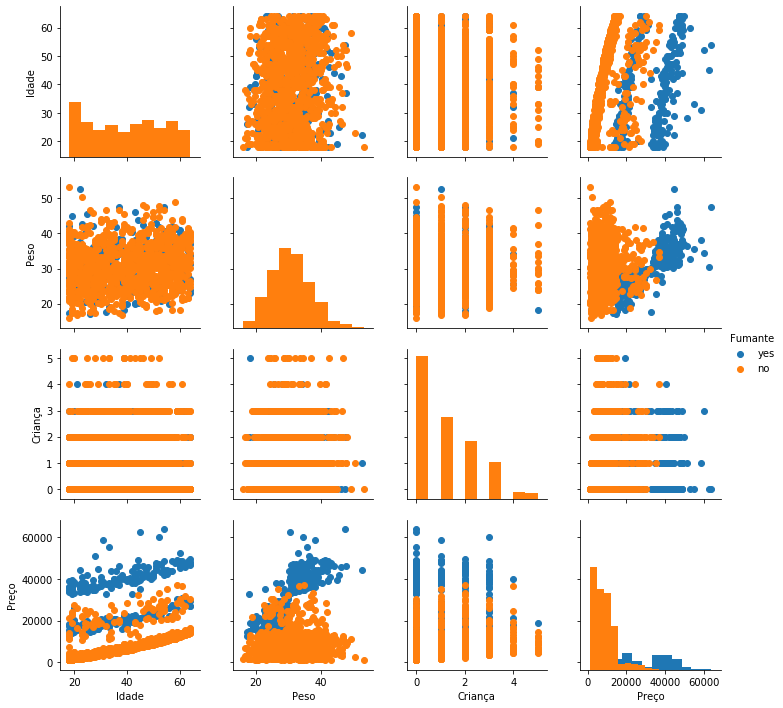

In [29]:
h = sns.PairGrid(dados, hue = "Fumante")
h = h.map_offdiag(plt.scatter)
h = h.map_diag(plt.hist)
h = h.add_legend()
plt.show()

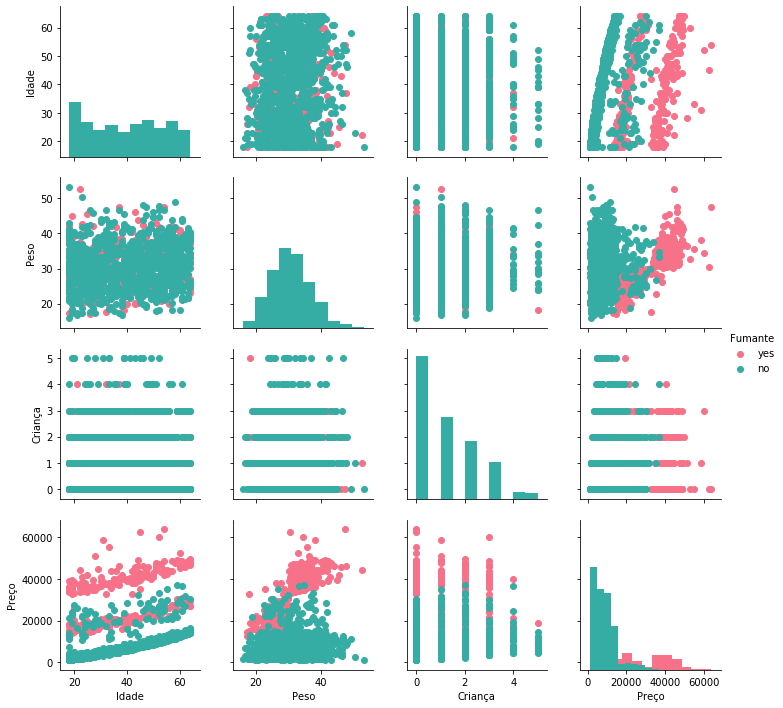

In [30]:
h = sns.PairGrid(dados, hue = "Fumante", palette="husl")
h = h.map_offdiag(plt.scatter)
h = h.map_diag(plt.hist)
h = h.add_legend()
plt.show()

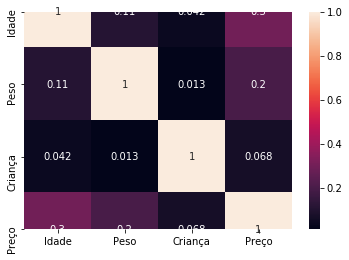

In [31]:
sns.heatmap(dados.corr(), annot = True)

# Treino e teste 

In [32]:
train = dados.iloc[:, 0:8].values
test = dados.iloc[:, 1].values

In [33]:
dados.drop(["Sexo", "Região", "Fumante"], axis = 1, inplace = True)

In [34]:
X=dados.drop('Preço', axis=1)
y=dados['Preço']

In [35]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [36]:
X_train.shape

(1070, 3)

In [37]:
x_test.shape

(268, 3)

# Rede Neural modelo ANN

In [38]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [3]))
model.add(tf.keras.layers.Dense(units = 1, input_shape = [3]))
model.add(tf.keras.layers.Dense(units = 1, input_shape = [3]))
model.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = "mean_squared_error")
model_json = model.to_json()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [39]:
hist = model.fit(X_train, y_train, epochs = 500)

Train on 1070 samples
Epoch 1/500
1070/1070 [==============================] - 1s 622us/sample - loss: 296476420.1121
Epoch 2/500
1070/1070 [==============================] - 0s 78us/sample - loss: 144454707.1551
Epoch 3/500
1070/1070 [==============================] - 0s 98us/sample - loss: 134719633.6449
Epoch 4/500
1070/1070 [==============================] - 0s 71us/sample - loss: 133438781.9065
Epoch 5/500
1070/1070 [==============================] - 0s 75us/sample - loss: 134094357.2935
Epoch 6/500
1070/1070 [==============================] - 0s 69us/sample - loss: 134287314.7813
Epoch 7/500
1070/1070 [==============================] - 0s 69us/sample - loss: 133876096.9570
Epoch 8/500
1070/1070 [==============================] - 0s 72us/sample - loss: 134198059.3645
Epoch 9/500
1070/1070 [==============================] - 0s 74us/sample - loss: 133891085.3383
Epoch 10/500
1070/1070 [==============================] - 0s 66us/sample - loss: 133875386.1682
Epoch 11/500
1070/1070 [==

1070/1070 [==============================] - 0s 87us/sample - loss: 133491860.0748
Epoch 87/500
1070/1070 [==============================] - 0s 67us/sample - loss: 133781961.7794
Epoch 88/500
1070/1070 [==============================] - 0s 67us/sample - loss: 134039354.4673
Epoch 89/500
1070/1070 [==============================] - 0s 69us/sample - loss: 134024533.7421
Epoch 90/500
1070/1070 [==============================] - 0s 67us/sample - loss: 134123338.6467
Epoch 91/500
1070/1070 [==============================] - 0s 68us/sample - loss: 133843482.0636
Epoch 92/500
1070/1070 [==============================] - 0s 69us/sample - loss: 133014609.4804
Epoch 93/500
1070/1070 [==============================] - 0s 72us/sample - loss: 133417942.8486
Epoch 94/500
1070/1070 [==============================] - 0s 80us/sample - loss: 133832882.5421
Epoch 95/500
1070/1070 [==============================] - 0s 69us/sample - loss: 133557812.5832
Epoch 96/500
1070/1070 [=============================

1070/1070 [==============================] - 0s 73us/sample - loss: 132478322.5869
Epoch 171/500
1070/1070 [==============================] - 0s 69us/sample - loss: 133610360.4336
Epoch 172/500
1070/1070 [==============================] - 0s 64us/sample - loss: 133243729.8841
Epoch 173/500
1070/1070 [==============================] - 0s 67us/sample - loss: 132713398.1907
Epoch 174/500
1070/1070 [==============================] - 0s 67us/sample - loss: 133037924.1794
Epoch 175/500
1070/1070 [==============================] - 0s 69us/sample - loss: 132570734.8636
Epoch 176/500
1070/1070 [==============================] - 0s 66us/sample - loss: 133382028.5757
Epoch 177/500
1070/1070 [==============================] - 0s 68us/sample - loss: 133223857.9140
Epoch 178/500
1070/1070 [==============================] - 0s 68us/sample - loss: 133960415.2822
Epoch 179/500
1070/1070 [==============================] - 0s 68us/sample - loss: 132557974.7364
Epoch 180/500
1070/1070 [===================

1070/1070 [==============================] - 0s 68us/sample - loss: 132432635.1850
Epoch 255/500
1070/1070 [==============================] - 0s 68us/sample - loss: 132599334.9084
Epoch 256/500
1070/1070 [==============================] - 0s 67us/sample - loss: 133335515.6935
Epoch 257/500
1070/1070 [==============================] - 0s 65us/sample - loss: 133412829.5776
Epoch 258/500
1070/1070 [==============================] - 0s 70us/sample - loss: 132337970.5421
Epoch 259/500
1070/1070 [==============================] - 0s 65us/sample - loss: 133162522.6766
Epoch 260/500
1070/1070 [==============================] - 0s 68us/sample - loss: 132152943.5215
Epoch 261/500
1070/1070 [==============================] - 0s 67us/sample - loss: 132031572.8449
Epoch 262/500
1070/1070 [==============================] - 0s 69us/sample - loss: 133033100.4710
Epoch 263/500
1070/1070 [==============================] - 0s 68us/sample - loss: 132432661.3234
Epoch 264/500
1070/1070 [===================

1070/1070 [==============================] - 0s 68us/sample - loss: 132193633.9963
Epoch 339/500
1070/1070 [==============================] - 0s 68us/sample - loss: 132714198.1757
Epoch 340/500
1070/1070 [==============================] - 0s 68us/sample - loss: 132433664.4561
Epoch 341/500
1070/1070 [==============================] - 0s 65us/sample - loss: 132198441.8093
Epoch 342/500
1070/1070 [==============================] - 0s 68us/sample - loss: 132374832.9869
Epoch 343/500
1070/1070 [==============================] - 0s 67us/sample - loss: 132212073.2411
Epoch 344/500
1070/1070 [==============================] - 0s 70us/sample - loss: 132500909.2037
Epoch 345/500
1070/1070 [==============================] - 0s 67us/sample - loss: 132133696.2841
Epoch 346/500
1070/1070 [==============================] - 0s 67us/sample - loss: 132538931.2299
Epoch 347/500
1070/1070 [==============================] - 0s 66us/sample - loss: 132024921.1065
Epoch 348/500
1070/1070 [===================

1070/1070 [==============================] - 0s 68us/sample - loss: 131993262.6841
Epoch 423/500
1070/1070 [==============================] - 0s 67us/sample - loss: 132380283.3495
Epoch 424/500
1070/1070 [==============================] - 0s 68us/sample - loss: 131954499.3346
Epoch 425/500
1070/1070 [==============================] - 0s 70us/sample - loss: 132839738.9458
Epoch 426/500
1070/1070 [==============================] - 0s 66us/sample - loss: 131896499.4542
Epoch 427/500
1070/1070 [==============================] - 0s 65us/sample - loss: 132471933.6224
Epoch 428/500
1070/1070 [==============================] - 0s 67us/sample - loss: 132211229.1589
Epoch 429/500
1070/1070 [==============================] - 0s 66us/sample - loss: 132634858.5271
Epoch 430/500
1070/1070 [==============================] - 0s 67us/sample - loss: 132290848.3738
Epoch 431/500
1070/1070 [==============================] - 0s 67us/sample - loss: 132863603.8879
Epoch 432/500
1070/1070 [===================

In [40]:
hist.history.keys()

dict_keys(['loss'])

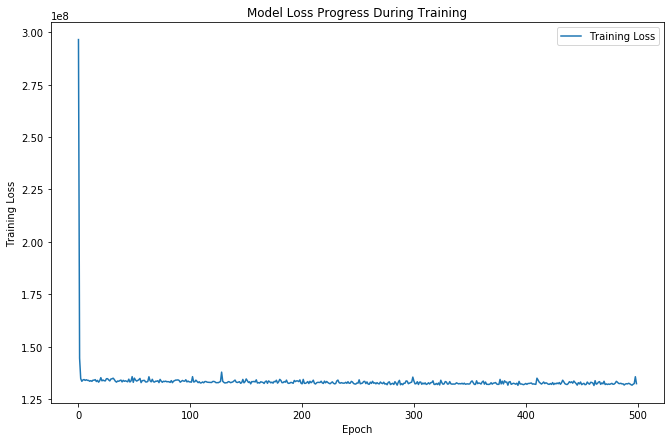

In [41]:
plt.figure(figsize=(11,7))
plt.plot(hist.history["loss"])
plt.title("Model Loss Progress During Training")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])

In [42]:
model.get_weights()

[array([[-3.780797 ],
        [-5.0028415],
        [-6.8562894]], dtype=float32),
 array([84.45876], dtype=float32),
 array([[-7.2343054]], dtype=float32),
 array([-70.90899], dtype=float32),
 array([[7.9730577]], dtype=float32),
 array([-57.699226], dtype=float32)]

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_predict = model.predict(x_test)

RMSE = mean_squared_error(y_test, y_predict)
MSE = np.sqrt(mean_squared_error(y_test, y_predict))
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 118001997.37968773 
MSE = 10862.872427663307 
MAE = 8213.226021762475 
R2 = 0.12009298290558745


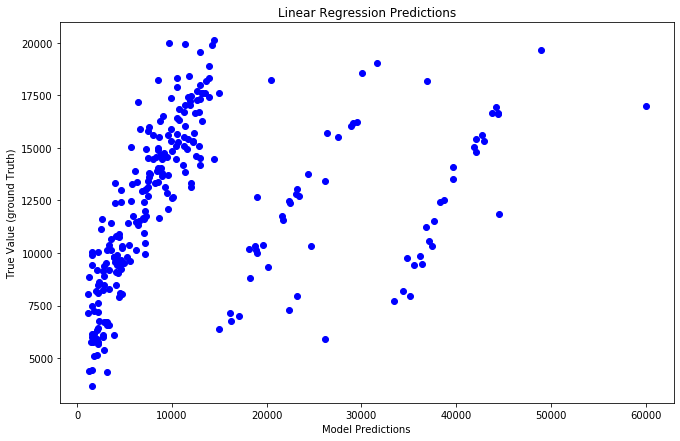

In [44]:
y_predict = model.predict(x_test)

plt.figure(figsize=(11,7))
plt.plot(y_test, y_predict, "o", color = 'b')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

# Previsão

In [45]:
y_predict = model.predict(x_test)
y_predict

array([[17622.805 ],
       [16733.014 ],
       [18204.678 ],
       [18569.002 ],
       [14581.796 ],
       [12378.136 ],
       [17616.645 ],
       [10053.999 ],
       [15405.143 ],
       [ 9534.258 ],
       [13627.256 ],
       [15527.117 ],
       [ 9600.871 ],
       [12531.429 ],
       [10352.087 ],
       [14607.692 ],
       [ 5388.4473],
       [ 9586.1   ],
       [16834.855 ],
       [17187.33  ],
       [ 9912.596 ],
       [16322.274 ],
       [10254.962 ],
       [12474.38  ],
       [10353.496 ],
       [18227.98  ],
       [ 5075.2197],
       [19057.871 ],
       [17594.514 ],
       [ 9821.14  ],
       [ 5777.517 ],
       [14042.324 ],
       [10644.773 ],
       [ 8804.98  ],
       [15300.63  ],
       [ 6729.592 ],
       [ 8891.972 ],
       [ 7636.6973],
       [ 3692.8716],
       [13276.762 ],
       [10926.361 ],
       [10486.758 ],
       [ 9639.694 ],
       [13012.128 ],
       [11317.568 ],
       [13877.209 ],
       [16431.363 ],
       [18877

# Salvando o modelo

In [46]:
model_json = model.to_json()

with open('model_ANN.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model_ANN.h5')